In [126]:
import sys
import Green_functions as gr
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib qt

sim = gr.simulation()
sim.GYSRMapCalcSquare(xypx=100,xy=(-40,40),mode=2)
sim.map2Dplot()


1 cycle: 0.001 minutes --- Total time: 7.98 seconds


In [113]:
sim.G0MAPcalcSquare(xypx=100,xy=(-120,120),mode=1)
sim.map2Dplot()

1 cycle: 0.00698089599609375 allcycle: 0.698089599609375


[1, 1, 0.774430215098487, 0.3383546773522696]
[1, 1, 0.7757090096168137, 0.3364364855747795]
[1, 1, 0.7769911438656407, 0.3345132842015391]
[1, 1, 0.7782765863463978, 0.33258512048040323]
[1, 1, 0.7795653046425146, 0.3306520430362281]
[1, 1, 0.7808572654081452, 0.32871410188778216]
[1, 1, 0.7821524343569545, 0.32677134846456835]
[1, 1, 0.7834507762509705, 0.3248238356235443]
[1, 1, 0.7847522548895136, 0.32287161766572936]
[1, 1, 0.7860568330982092, 0.3209147503526861]
[1, 1, 0.787364472718092, 0.31895329092286195]
[1, 1, 0.7886751345948129, 0.3169872981077807]
[1, 1, 0.7899887785679556, 0.31501683214806664]
[1, 1, 0.7913053634604725, 0.3130419548092912]
[1, 1, 0.7926248470682502, 0.3110627293976247]
[1, 1, 0.7939471861498125, 0.30907922077528116]
[1, 1, 0.7952723364161733, 0.3070914953757399]
[1, 1, 0.7966002525208471, 0.30509962121872936]
[1, 1, 0.7979308880500289, 0.30310366792495674]
[1, 1, 0.799264195512954, 0.3011037067305691]
[1, 1, 0.800600126332448, 0.29909981050132806]
[1, 1, 

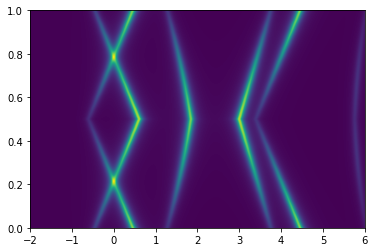

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def P(D,Delta,J,E,T):
    En=Energies(D,Delta,J)
    return np.divide(np.exp(-np.divide(E,T)),np.sum(np.exp(-np.divide(En,T))))
    
def peak(D,Delta,J,x,DeltaE,Gamma,w,T,E0):
    return w*P(D,Delta,J,E0,T)*np.divide(Gamma,np.add(np.power(np.add(x,-DeltaE),2),Gamma**2/2))

def Energies(D,Delta,J):
    return [D/4-Delta,D/4+Delta,D/4-7*J/4,D/4+5*J/4,(1/4)*(5*D-J-2*np.sqrt(4*D**2-4*D*J+9*J**2)),(1/4)*(5*D-J+2*np.sqrt(4*D**2-4*D*J+9*J**2))]

def weights(D,Delta,J):
    return [1,1,(1/2)*((-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2/(8*J**2+np.abs(-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)+(8*J**2/(8*J**2+np.abs(-2*D+J+np.sqrt(4*D**2-4*D*J+9*J**2))**2))),(1/2)*((2*D-J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)/(8*J**2+np.abs(2*D-J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)+(8*J**2/(8*J**2+np.abs(-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2))]

## LIST OF ABSOLUTE ENERGIES AND TRANSITION WEIGHTS ##
#  EGSW=D/4-Delta (Sz=+-1/2)
#  EW1=D/4+Delta  (Sz=+-1/2)
#  EGSS=D/4-7*J/4 (Sz=0)
#  ES1=D/4+5*J/4 (Sz=0)
#  ES2=(1/4)*(5*D-J-2*np.sqrt[4D**2-4*D*J+9J**2]) (Sz=+-1)
#  ES3=(1/4)*(5*D-J+2*np.sqrt[4D**2-4*D*J+9J**2]) (Sz=+-1)
#  1/2(2-0)-->1/2(down), w1=1/4 (EGSS-EGSW) and w1*=1/4 (ES1-EGSW)
#  -1/2(2-0)-->-1/2(up), w1=1/4 (EGSS-EGSW) and w1*=1/4 (ES1-EGSW)
#  1/2(2-0)-->1/2(up), w3=(1/2)(2*D-J+np.sqrt(4*D**2-4*D*J+9J**2))**2/(8J**2+J*np.abs(2*D-J+np.sqrt(4*D**2-4*D*J+9J**2))) (ES2-EGSW)
#  w3*=(1/2)(2*D-J-np.sqrt(4*D**2-4*D*J+9J**2))**2/(8J**2+J*np.abs(2*D-J-np.sqrt(4*D**2-4*D*J+9J**2))) (ES3-EGSW)
#  -1/2(2-0)-->1/2(downm) w3 (ES2-EGSW) and w3* (ES3-EGSW)
#  1/2(down)-(-1/2)(up)--> 1/2(2) or (-1/2)(0), w4=1/4 (EGSW-EGSS) and W4*=1/4 (EW1-EGSS)


D=2
Delta=2

a=np.linspace(0.8,1.4,100)
b=np.linspace(1.4,0.8,100)
J=np.concatenate((b,a))
x=np.linspace(-2,6,1000)
T=0.3
Gamma=0.1


Y=[]
for i in J:
    E=Energies(D,Delta,i)
    w=weights(D,Delta,i)
    print(w)
    p1=peak(D,Delta,i,x,E[2]-E[0],Gamma,w[0],T,E[0])
    p2=peak(D,Delta,i,x,E[3]-E[0],Gamma,w[1],T,E[0])
    p3=peak(D,Delta,i,x,E[4]-E[0],Gamma,w[2],T,E[0])
    p4=peak(D,Delta,i,x,E[5]-E[0],Gamma,w[3],T,E[0])
    p5=peak(D,Delta,i,x,E[0]-E[2],Gamma,w[0],T,E[2])
    p6=peak(D,Delta,i,x,E[1]-E[2],Gamma,w[1],T,E[2])
    Y.append(p1+p2+p3+p4+p5+p6)
    #pp1=
    #pp2=
    #pp3=
    #pp4=
    #pp5=
    #pp6=
plt.imshow(Y,aspect='auto',extent=(-2,6,0,1))
plt.show()

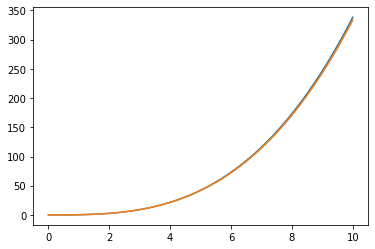

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.divide(np.power(x,3),3)
y=[]
x=np.linspace(0,10,100)
for i in x:
    a=np.linspace(0,i,100)
    b=np.sum(np.power(a,2))*np.abs(a[1]-a[0])
    y.append(b)

plt.plot(x,y)
plt.plot(x,f(x))

In [83]:
import numpy as np
a=[]
b=[1,2]
c=[3,4]
b=np.linspace(0,1,2)
c=np.linspace(1,3,2)

print(np.concatenate((b,c)))

[0. 1. 1. 3.]


In [55]:
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
%matplotlib qt
def M(Del,D,J,U):
    Mat1=[[(25/4)*D + (5/4)*J, 0, np.sqrt(10)*U, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, (9/4)*D + (3/4)*J, 0, 3*np.sqrt(2)*U, 0, 0, (J/2)*np.sqrt(5), 0, 0, 0, 0, 0],
    [np.sqrt(10)*U, 0, (1/4)*D + (1/4)*J, 0, 3*np.sqrt(2)*U, 0, 0, J*np.sqrt(2), 0, 0, 0, 0], 
    [0, 3*np.sqrt(2)*U, 0, (1/4)*D - (1/4)*J, 0, np.sqrt(10)*U, 0, 0, (J/2)*3, 0, 0, 0], 
    [0, 0, 3*np.sqrt(2)*U, 0, (9/4)*D - (3/4)*J, 0, 0, 0, 0, J*np.sqrt(2), 0, 0], 
    [0, 0, 0, np.sqrt(10)*U, 0, (25/4)*D - (5/4)*J, 0, 0, 0, 0, (J/2)*np.sqrt(5), 0], 
    [0, (J/2)*np.sqrt(5), 0, 0, 0, 0, (25/4)*D - (5/4)*J, 0, np.sqrt(10)*U, 0, 0, 0], 
    [0, 0, J*np.sqrt(2), 0, 0, 0, 0, (9/4)*D - (3/4)*J, 0, 3*np.sqrt(2)*U, 0, 0], 
    [0, 0, 0, (3*J/2), 0, 0, np.sqrt(10)*U, 0, (1/4)*D - (1/4)*J, 0, 3*np.sqrt(2)*U, 0], 
    [0, 0, 0, 0, J*np.sqrt(2), 0, 0, 3*np.sqrt(2)*U, 0, (1/4)*D + (1/4)*J, 0, np.sqrt(10)*U], 
    [0, 0, 0, 0, 0, (J/2)*np.sqrt(5), 0, 0, 3*np.sqrt(2)*U, 0, (9/4)*D + (3/4)*J, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, np.sqrt(10)*U, 0, (25/4)*D + (5/4)*J]]
    Mat0=[[(25/4)*D, 0, np.sqrt(10)*U, 0, 0, 0, Del, 0, 0, 0, 0, 0], 
    [0, (9/4)*D, 0, 3*np.sqrt(2)*U, 0, 0, 0, Del, 0, 0, 0, 0], 
    [np.sqrt(10)*U, 0, (1/4)*D, 0, 3*np.sqrt(2)*U, 0, 0, 0, Del, 0, 0, 0], 
    [0, 3*np.sqrt(2)*U, 0, (1/4)*D, 0, np.sqrt(10)*U, 0, 0, 0, Del, 0, 0], 
    [0, 0, 3*np.sqrt(2)*U, 0, (9/4)*D, 0, 0, 0, 0, 0, Del, 0], 
    [0, 0, 0, np.sqrt(10)*U, 0, (25/4)*D, 0, 0, 0, 0, 0, Del], 
    [Del, 0, 0, 0, 0, 0, (25/4)*D, 0, np.sqrt(10)*U, 0, 0, 0], 
    [0, Del, 0, 0, 0, 0, 0, (9/4)*D, 0, 3*np.sqrt(2)*U, 0, 0], 
    [0, 0, Del, 0, 0, 0, np.sqrt(10)*U, 0, (1/4)*D, 0, 3*np.sqrt(2)*U, 0], 
    [0, 0, 0, Del, 0, 0, 0, 3*np.sqrt(2)*U, 0, (1/4)*D, 0, np.sqrt(10)*U], 
    [0, 0, 0, 0, Del, 0, 0, 0, 3*np.sqrt(2)*U, 0, (9/4)*D, 0], 
    [0, 0, 0, 0, 0, Del, 0, 0, 0, np.sqrt(10)*U, 0, (25/4)*D]]
    return [Mat0,Mat1]

    
def peak(En,Gamma,DeltaE,w):
    return w*np.divide(Gamma,np.add(np.power(np.add(En,-DeltaE),2),Gamma**2/2))

def thermal(E1,E2,E,beta):
    a=np.exp(-E1*beta)+np.exp(-E2*beta)
    return np.exp(-E*beta)/a

cpup=np.kron([[0,1],[0,0]],np.identity(6))
cpdown01=np.kron([[0,0],[0,1]],np.identity(6))
cpdown10=np.kron([[1,0],[0,0]],np.identity(6))

Del=0.7


kJ1 = 1



Deltat = 0.68
a = np.array([0.596899091,0.592263,0.599925,0.592789,0.590584,0.597909,0.634405,0.648816,0.673330,0.72108,0.759739,0.781286,0.782148,0.778115,0.762544,0.745005,0.696710,0.652128,0.616709,0.606191,0.593855,0.590836,0.596292,0.606088,0.609632,])
a = a*1.0312
a = a-Deltat
b=np.linspace(0,1,len(a))
a=np.interp(np.linspace(0,1,200),b,a)

J1 = kJ1*(Del-a)*4/7




En = np.linspace(-1,3,1000)


D=0.7
U=0.05
# c = 1.298
# Deff = D*(1-c*J**2)



Y=[]
for i in range(len(J1)):
    y=[]
    for aaa in En:
        y.append(0)
    w0,v0=np.linalg.eigh(M(Del,D,J1[i],U)[0])
    w1,v1=np.linalg.eigh(M(Del,D,J1[i],U)[1])
    for j in range(len(w0)):
        temp1=np.dot(v1[:,j],np.dot(cpup,v0[:,0]))
        if np.abs(temp1)>0.0001:
            y=np.add(y,peak(En,0.01,w1[j]-w0[0],0.5*temp1**2*thermal(min(w0),min(w1),min(w0),50)))
        temp3=np.dot(v1[:,j],np.dot(cpup,v0[:,1]))
        if np.abs(temp3)>0.0001:
            y=np.add(y,peak(En,0.01,w1[j]-w0[1],0.5*temp3**2*thermal(min(w0),min(w1),min(w0),50)))
        temp2=np.dot(v0[:,j],np.dot(cpup,v1[:,0]))
        if np.abs(temp2)>0.0001:
            y=np.add(y,peak(En,0.01,w0[j]-min(w1),temp2**2*thermal(min(w0),min(w1),min(w1),50)))
    for j in range(len(w0)):
        temp1=np.dot(v1[:,j],np.dot(cpdown01,v0[:,0]))
        if np.abs(temp1)>0.0001:
            y=np.add(y,peak(En,0.01,w1[j]-min(w0),0.5*temp1**2*thermal(min(w0),min(w1),min(w0),50)))
        temp3=np.dot(v1[:,j],np.dot(cpdown01,v0[:,1]))
        if np.abs(temp3)>0.0001:
            y=np.add(y,peak(En,0.01,w1[j]-min(w0),0.5*temp3**2*thermal(min(w0),min(w1),min(w0),50)))
        temp2=np.dot(v0[:,j],np.dot(cpdown01,v1[:,0]))
        if np.abs(temp2)>0.0001:
            y=np.add(y,peak(En,0.01,w0[j]-min(w1),temp2**2*thermal(min(w0),min(w1),min(w1),50)))
    Y.append(y/np.linalg.norm(y))



f1, ax = plt.subplots()
plt.subplots_adjust(bottom=0.4)

ax.imshow(Y,aspect='auto',interpolation='nearest',extent=(-1,3,0,1))

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
%matplotlib qt
def M(Del,D,J,U):
    Mat1=[[(25/4)*D + (5/4)*J, 0, np.sqrt(10)*U, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, (9/4)*D + (3/4)*J, 0, 3*np.sqrt(2)*U, 0, 0, (J/2)*np.sqrt(5), 0, 0, 0, 0, 0],
    [np.sqrt(10)*U, 0, (1/4)*D + (1/4)*J, 0, 3*np.sqrt(2)*U, 0, 0, J*np.sqrt(2), 0, 0, 0, 0], 
    [0, 3*np.sqrt(2)*U, 0, (1/4)*D - (1/4)*J, 0, np.sqrt(10)*U, 0, 0, (J/2)*3, 0, 0, 0], 
    [0, 0, 3*np.sqrt(2)*U, 0, (9/4)*D - (3/4)*J, 0, 0, 0, 0, J*np.sqrt(2), 0, 0], 
    [0, 0, 0, np.sqrt(10)*U, 0, (25/4)*D - (5/4)*J, 0, 0, 0, 0, (J/2)*np.sqrt(5), 0], 
    [0, (J/2)*np.sqrt(5), 0, 0, 0, 0, (25/4)*D - (5/4)*J, 0, np.sqrt(10)*U, 0, 0, 0], 
    [0, 0, J*np.sqrt(2), 0, 0, 0, 0, (9/4)*D - (3/4)*J, 0, 3*np.sqrt(2)*U, 0, 0], 
    [0, 0, 0, (3*J/2), 0, 0, np.sqrt(10)*U, 0, (1/4)*D - (1/4)*J, 0, 3*np.sqrt(2)*U, 0], 
    [0, 0, 0, 0, J*np.sqrt(2), 0, 0, 3*np.sqrt(2)*U, 0, (1/4)*D + (1/4)*J, 0, np.sqrt(10)*U], 
    [0, 0, 0, 0, 0, (J/2)*np.sqrt(5), 0, 0, 3*np.sqrt(2)*U, 0, (9/4)*D + (3/4)*J, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, np.sqrt(10)*U, 0, (25/4)*D + (5/4)*J]]
    Mat0=[[(25/4)*D, 0, np.sqrt(10)*U, 0, 0, 0, Del, 0, 0, 0, 0, 0], 
    [0, (9/4)*D, 0, 3*np.sqrt(2)*U, 0, 0, 0, Del, 0, 0, 0, 0], 
    [np.sqrt(10)*U, 0, (1/4)*D, 0, 3*np.sqrt(2)*U, 0, 0, 0, Del, 0, 0, 0], 
    [0, 3*np.sqrt(2)*U, 0, (1/4)*D, 0, np.sqrt(10)*U, 0, 0, 0, Del, 0, 0], 
    [0, 0, 3*np.sqrt(2)*U, 0, (9/4)*D, 0, 0, 0, 0, 0, Del, 0], 
    [0, 0, 0, np.sqrt(10)*U, 0, (25/4)*D, 0, 0, 0, 0, 0, Del], 
    [Del, 0, 0, 0, 0, 0, (25/4)*D, 0, np.sqrt(10)*U, 0, 0, 0], 
    [0, Del, 0, 0, 0, 0, 0, (9/4)*D, 0, 3*np.sqrt(2)*U, 0, 0], 
    [0, 0, Del, 0, 0, 0, np.sqrt(10)*U, 0, (1/4)*D, 0, 3*np.sqrt(2)*U, 0], 
    [0, 0, 0, Del, 0, 0, 0, 3*np.sqrt(2)*U, 0, (1/4)*D, 0, np.sqrt(10)*U], 
    [0, 0, 0, 0, Del, 0, 0, 0, 3*np.sqrt(2)*U, 0, (9/4)*D, 0], 
    [0, 0, 0, 0, 0, Del, 0, 0, 0, np.sqrt(10)*U, 0, (25/4)*D]]
    return [Mat0,Mat1]

    
def peak(En,Gamma,DeltaE,w):
    return w*np.divide(Gamma,np.add(np.power(np.add(En,-DeltaE),2),Gamma**2/2))

def thermal(E1,E2,E,beta):
    a=np.exp(-E1*beta)+np.exp(-E2*beta)
    return np.exp(-E*beta)/a

cpup=np.kron([[0,1],[0,0]],np.identity(6))
cpdown01=np.kron([[0,0],[0,1]],np.identity(6))
cpdown10=np.kron([[1,0],[0,0]],np.identity(6))

Del=0.7


kJ1 = 1







En = np.linspace(-1,3,1000)

J=np.linspace(0,0.37,100)
D=0
U=0
# c = 1.298
# Deff = D*(1-c*J**2)



y=[]
yy=[]
for i in J:
    w0,v0=np.linalg.eigh(M(Del,D,i,U)[0])
    w1,v1=np.linalg.eigh(M(Del,D,i,U)[1])
    for j in range(len(w0)):
            plt.plot(i,w0[j],'bo',markersize=1)
            plt.plot(i,w1[j],'ro',markersize=1)
J=0.37
#U=np.concatenate((np.linspace(0.0,0.1,50),np.linspace(0.1,0,50)))
U=np.linspace(0.0,0.1,100)

for i in range(len(U)):
    w0,v0=np.linalg.eigh(M(Del,D,J,U[i])[0])
    w1,v1=np.linalg.eigh(M(Del,D,J,U[i])[1])
    for j in range(len(w0)):
        plt.plot(i*0.0025+0.38,w0[j],'bo')
        plt.plot(i*0.0025+0.38,w1[j],'ro')

print(v1[:,1],v1[:,2])

#J=np.linspace(0.37, 0.6,100)
#U=0
#
#for i in J:
#    w0,v0=np.linalg.eigh(M(Del,D,i,U)[0])
#    w1,v1=np.linalg.eigh(M(Del,D,i,U)[1])
#    for j in range(len(w0)):
#        temp1=np.dot(v1[:,j],np.dot(cpup,v0[:,0]))
#        if np.abs(temp1)>0.000001:
#            plt.plot(i+0.47,w0[j],'bo')
#    for j in range(len(w1)):
#        temp1=np.dot(v0[:,j],np.dot(cpup,v1[:,0]))
#        if np.abs(temp1)>0.000001:
#            plt.plot(i+0.47,w1[j],'ro')

plt.show()

[ 9.29086371e-02 -1.11022302e-16 -4.54532124e-01  3.33066907e-16
  5.33637080e-01 -2.84494650e-16  2.25149752e-16  5.33637080e-01
 -3.21660029e-16 -4.54532124e-01  1.86457567e-16  9.29086371e-02] [-1.37344571e-17  2.47624440e-01  5.55111512e-17  9.10227279e-02
 -2.22044605e-16 -6.56046492e-01 -6.56046492e-01  1.94289029e-16
  9.10227279e-02  0.00000000e+00  2.47624440e-01  4.16333634e-17]
